# Creating Figures Strong Corr

## Creating Panel B

AKED0620210804:   0%|          | 0/8366 [00:00<?, ?it/s]

AKED0620210804:   2%|▏         | 202/8366 [01:48<1:28:37,  1.54it/s]

KeyboardInterrupt: 

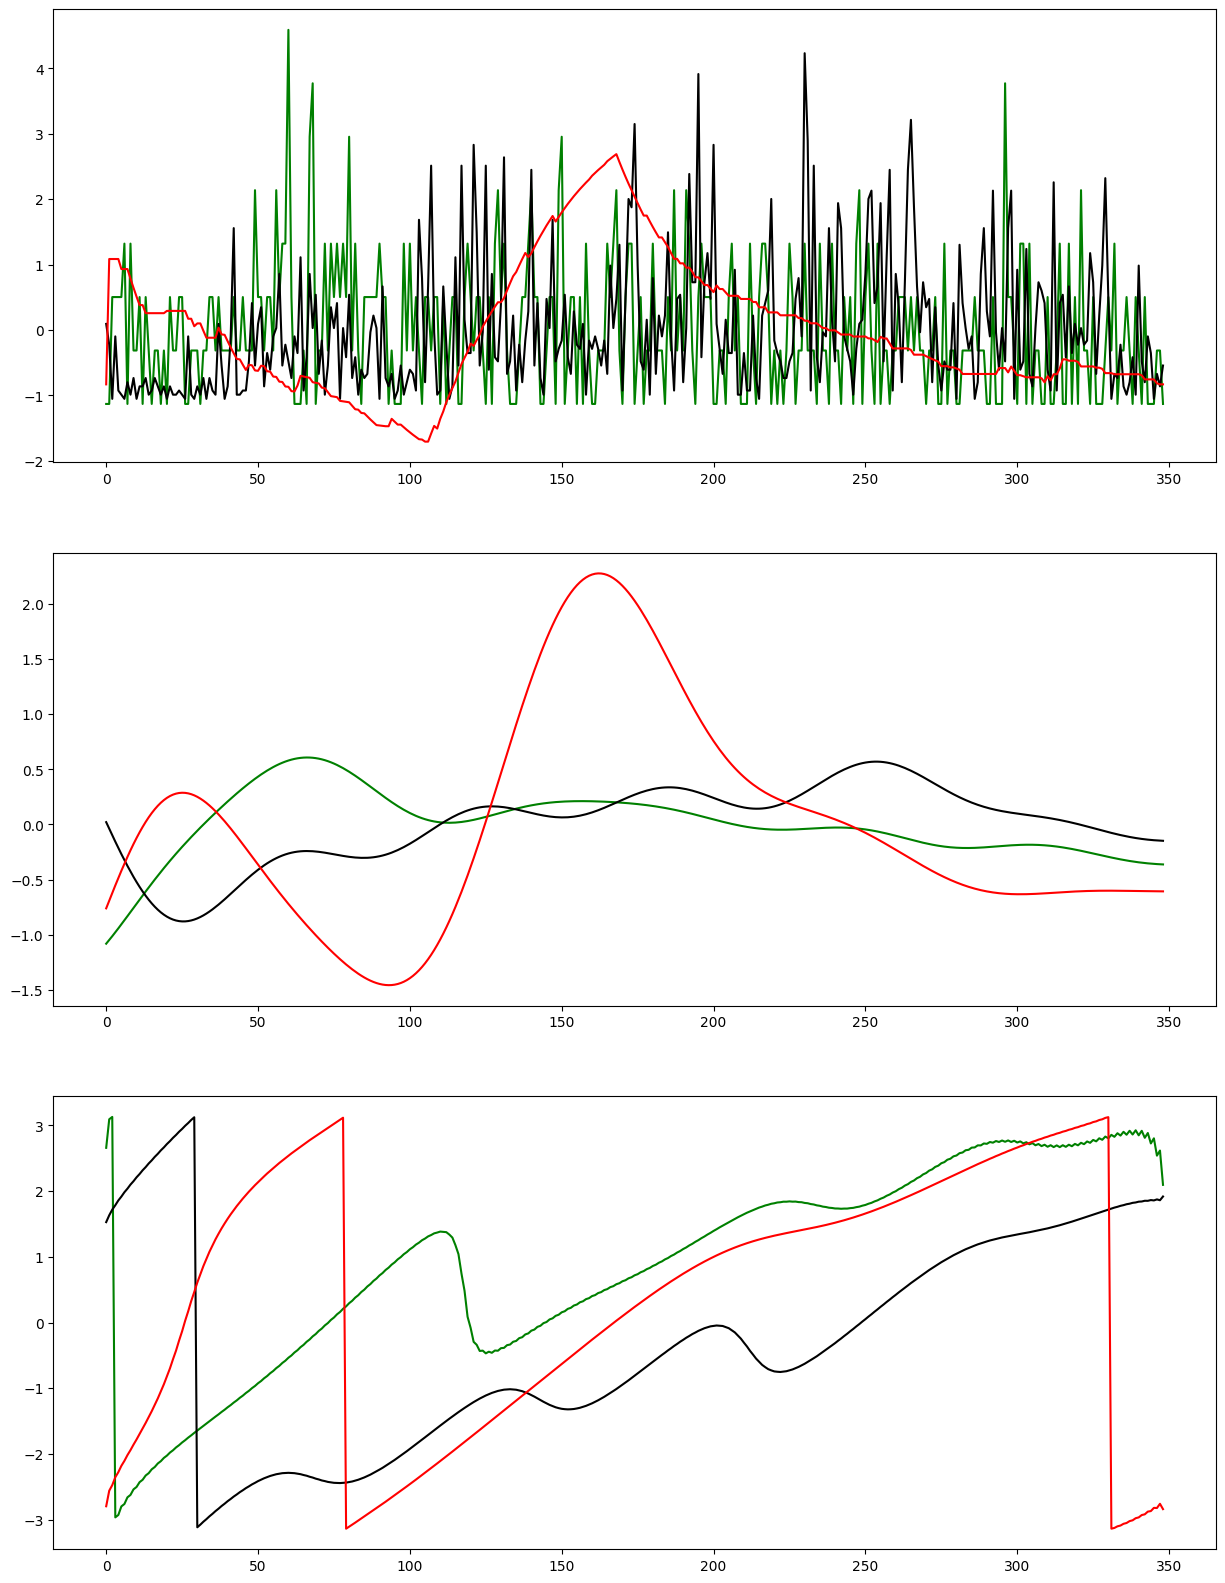

In [1]:
from lib.figure_6 import get_fig_6_panel_b

get_fig_6_panel_b()

## Panel C All

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from os.path import join as pjoin
from os.path import basename
from os import listdir

from lib.figure_6 import get_fig_6_panel_c, phase_diff_pfc_dms
from lib.calculation import get_session_performances, get_response_bg_firing

phase_diffs = []
phase_diffs_bg = [] 
bin_size = 100

performances, cutoff = get_session_performances()
spike_data_root = pjoin('data', 'spike_times', 'sessions')
behaviour_root = pjoin('data', 'behaviour_data')

for session_name in listdir(spike_data_root):
    behaviour = pjoin(behaviour_root, session_name + '.csv')
    behaviour_data = pd.read_csv(behaviour)
    cue_times = behaviour_data['cue_time'].tolist()
    for pfc in glob(pjoin(spike_data_root, session_name, 'pfc_*')):
        pfc_times = np.load(pfc)
        for dms in glob(pjoin(spike_data_root, session_name, 'dms_*')):
            str_times = np.load(dms)
            pfc_mag, pfc_bg = get_response_bg_firing(cue_times=cue_times, spike_times=pfc_times)
            dms_mag, dms_bg = get_response_bg_firing(cue_times=cue_times, spike_times=str_times)
            phase_d, phase_d_bg = phase_diff_pfc_dms(pfc_mag=pfc_mag, pfc_bg=pfc_bg, dms_mag=dms_mag, dms_bg=dms_bg)
            phase_diffs.append(phase_d)
            phase_diffs_bg.append(phase_d_bg)


fig = get_fig_6_panel_c(phase_diffs=phase_diffs, phase_diffs_bg=phase_diffs_bg, bin_size=36, zero_ymin=False)

KeyboardInterrupt: 

## Panel D All

In [2]:
from lib.figure_6 import get_figure_6_panel_d

get_figure_6_panel_d(mono=False, bin_size=36, zero_ymin=False)

  0%|          | 0/29 [00:04<?, ?it/s]


KeyboardInterrupt: 

## Check relative value and PRPD correlation

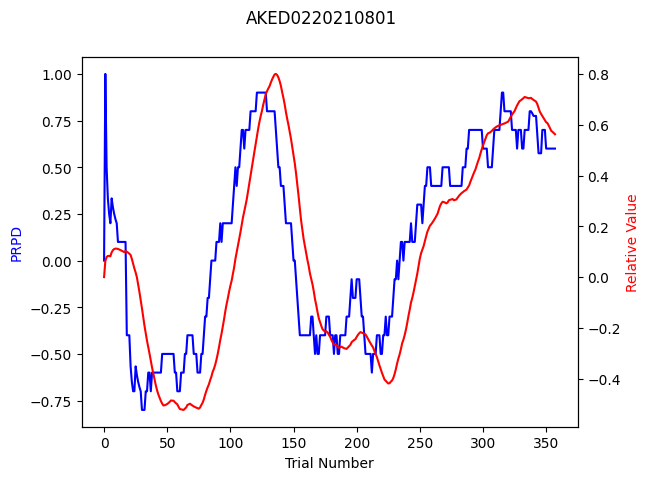

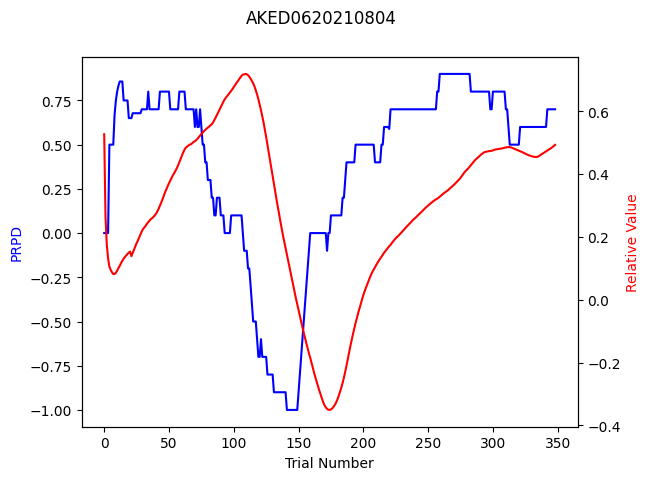

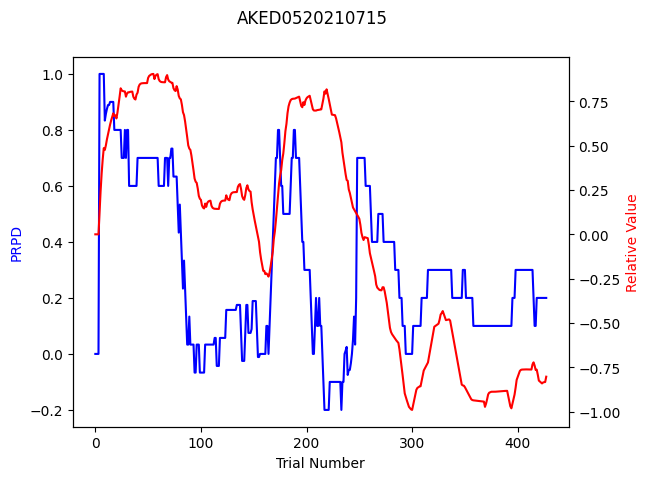

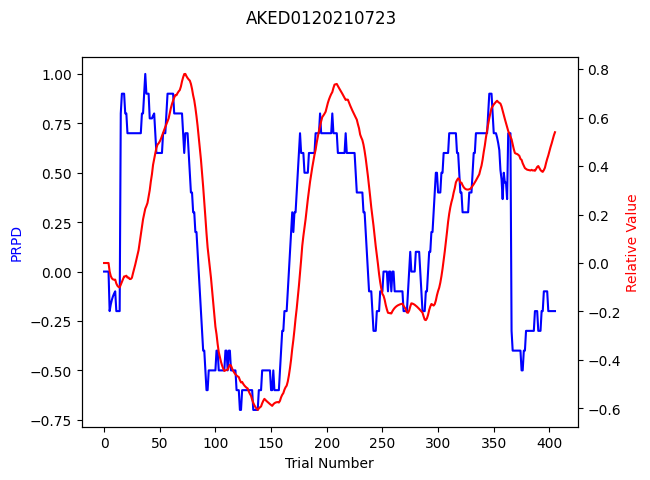

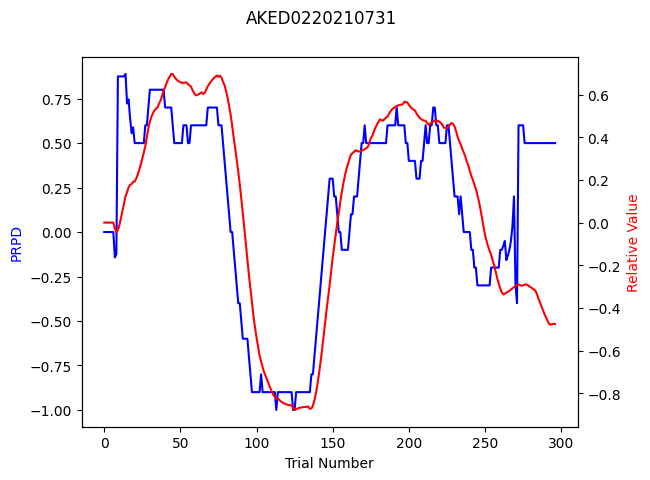

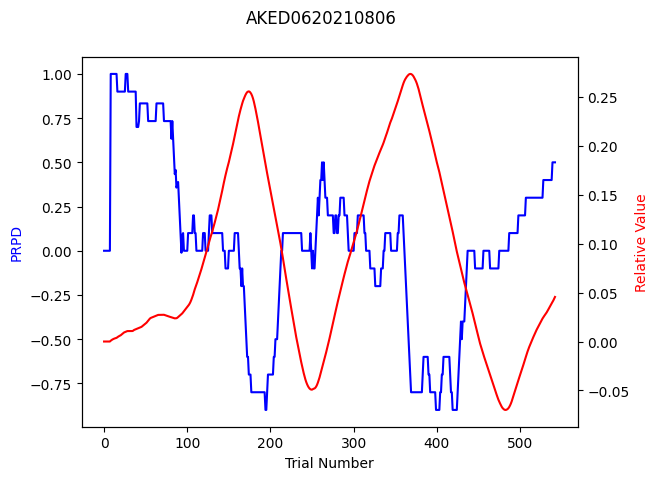

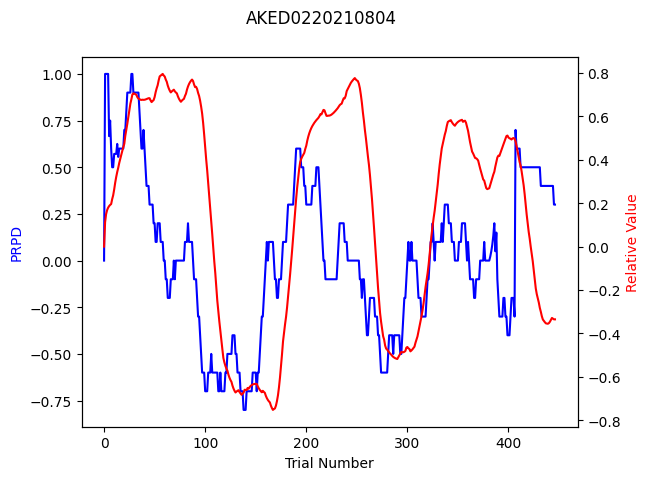

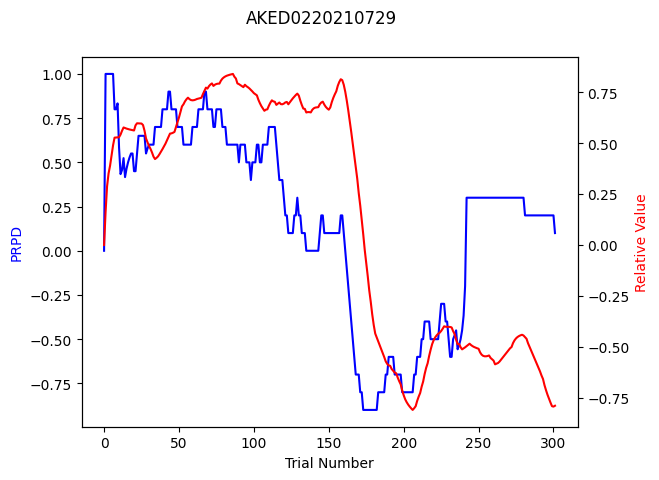

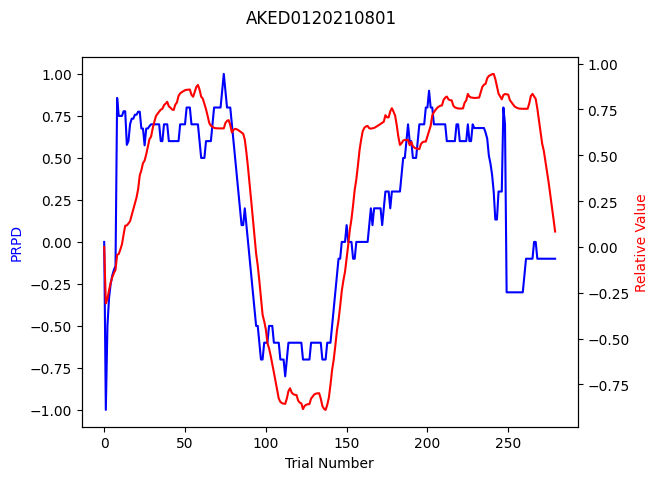

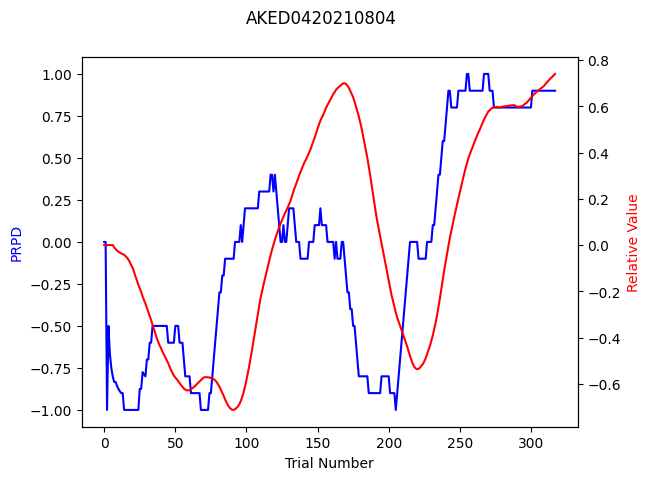

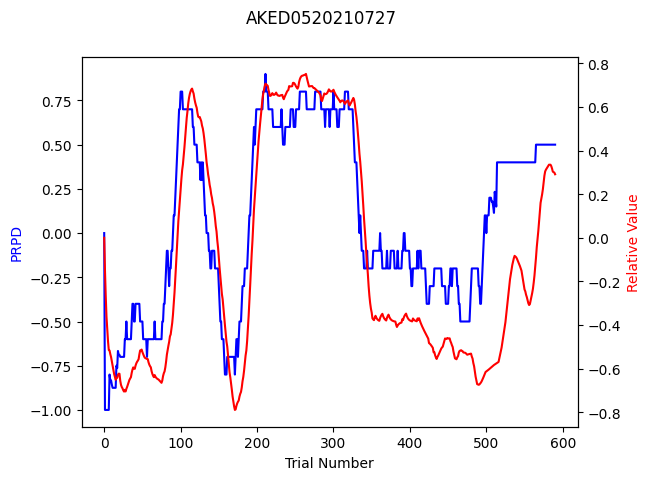

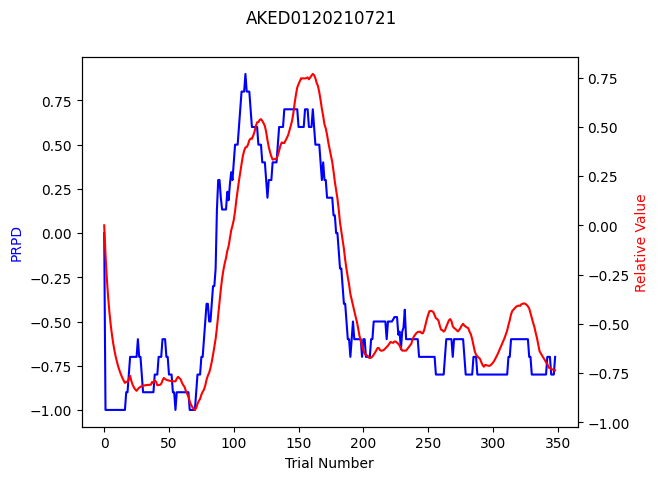

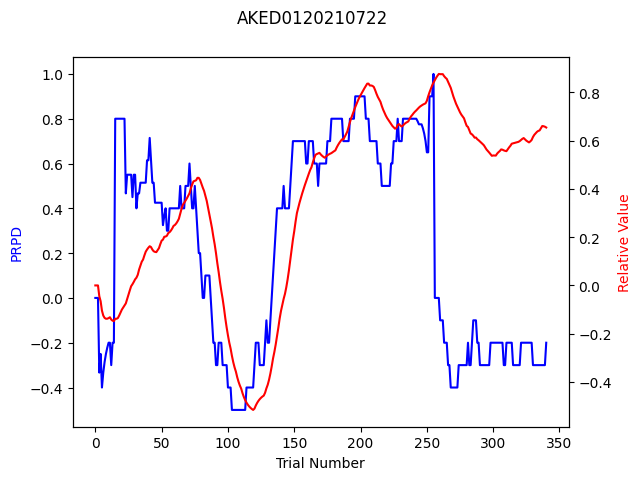

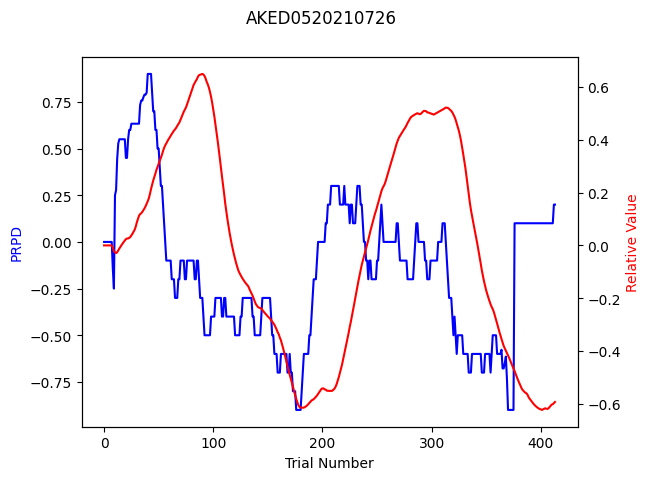

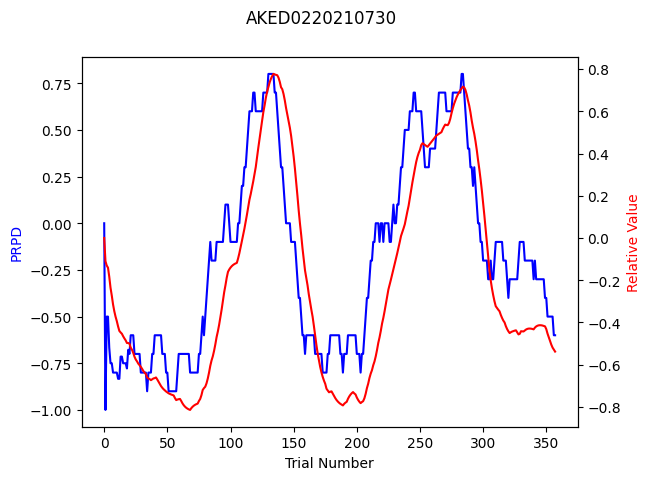

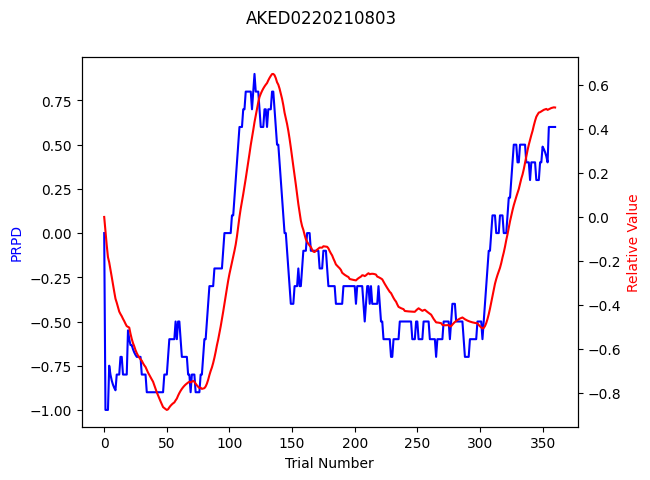

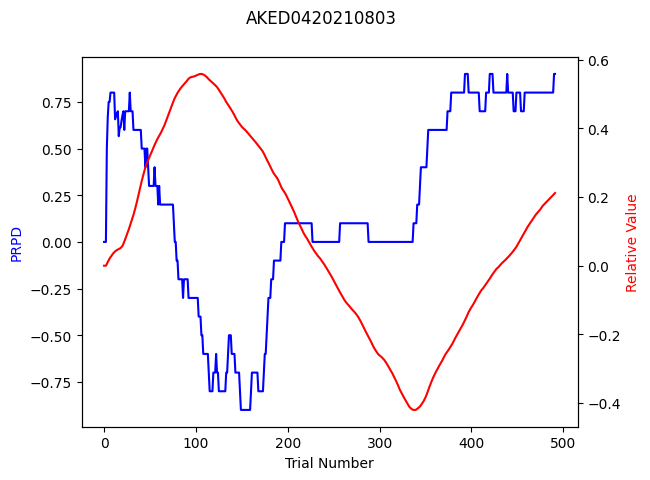

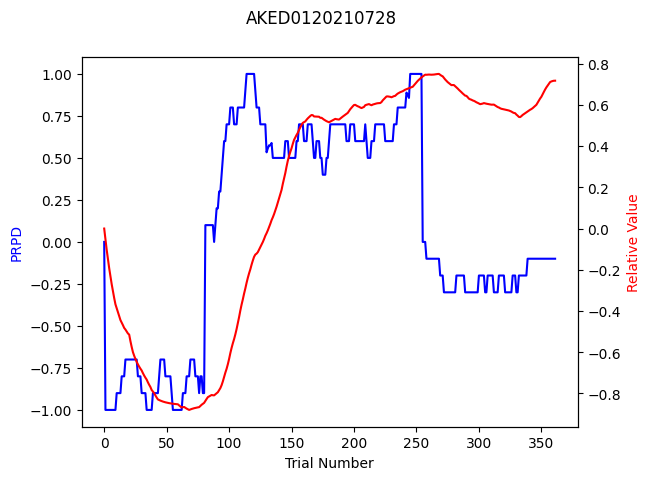

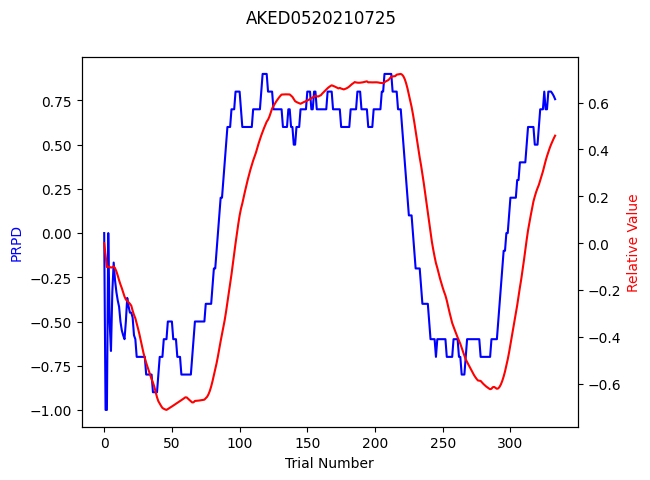

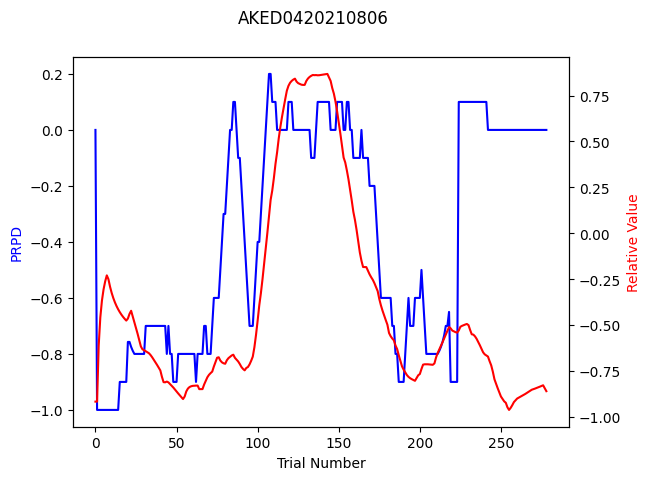

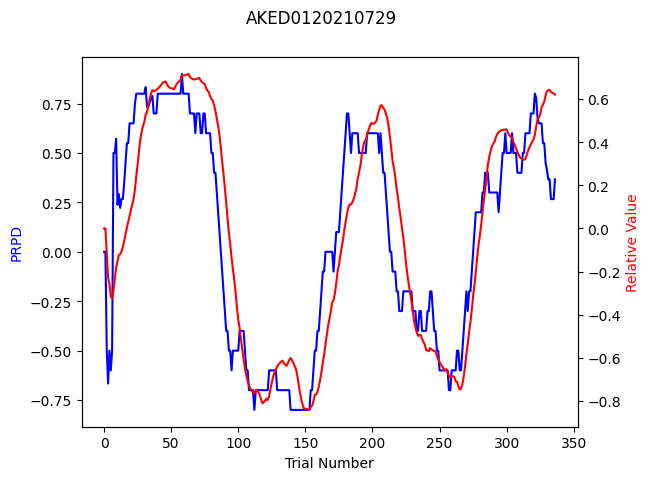

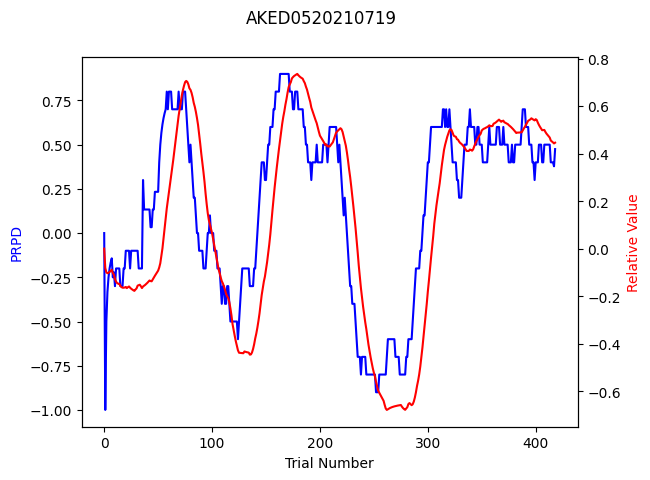

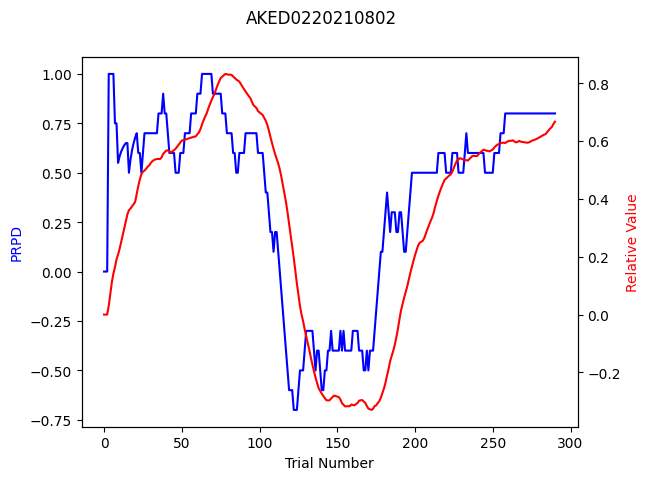

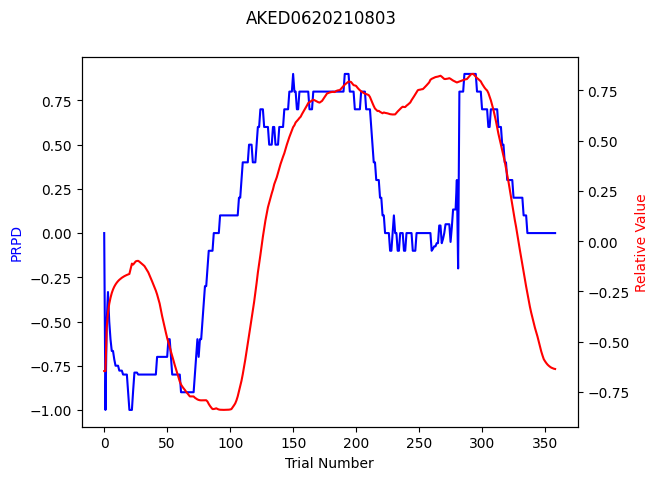

In [1]:
# for each session, load the relative value and the PRPD
# plot the PRPD against the relative value

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from os.path import join as pjoin
from os.path import basename
from os import listdir

from lib.calculation import moving_window_mean_prior

for session in glob(pjoin('data', 'relative_values', '*.npy')):
    session = basename(session)
    session_name = session.split('.')[0]
    relative_value_path = pjoin('data', 'relative_values', session)
    relative_value = np.load(relative_value_path)
    # smoothen the relative value
    relative_value = moving_window_mean_prior(relative_value, 20)
    prpd_path = pjoin('data', 'prpd', session)
    prpd = np.load(prpd_path)
    # load the behaviour data and remove the nan trials in prpd
    behaviour_data = pd.read_csv(pjoin('data', 'behaviour_data', session_name + '.csv'))
    
    # plot PRPD and relative values as twin x line plot
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(prpd, color='blue')
    ax2.plot(relative_value, color='red')
    ax1.set_ylabel('PRPD', color='blue')
    ax2.set_ylabel('Relative Value', color='red')
    ax1.set_xlabel('Trial Number')
    fig.suptitle(session_name)
    plt.show()
    plt.close()

# Panel E

100%|██████████| 29/29 [00:07<00:00,  4.14it/s]


PFC response: -0.1307344334955598
PFC bg: -0.4243621154531363
DMS response: 1.1625292352525616
DMS bg: 1.2742669343490292
PFC response: 1361 / 1668
PFC bg: 1321 / 1668
DMS response: 819 / 974
DMS bg: 793 / 974


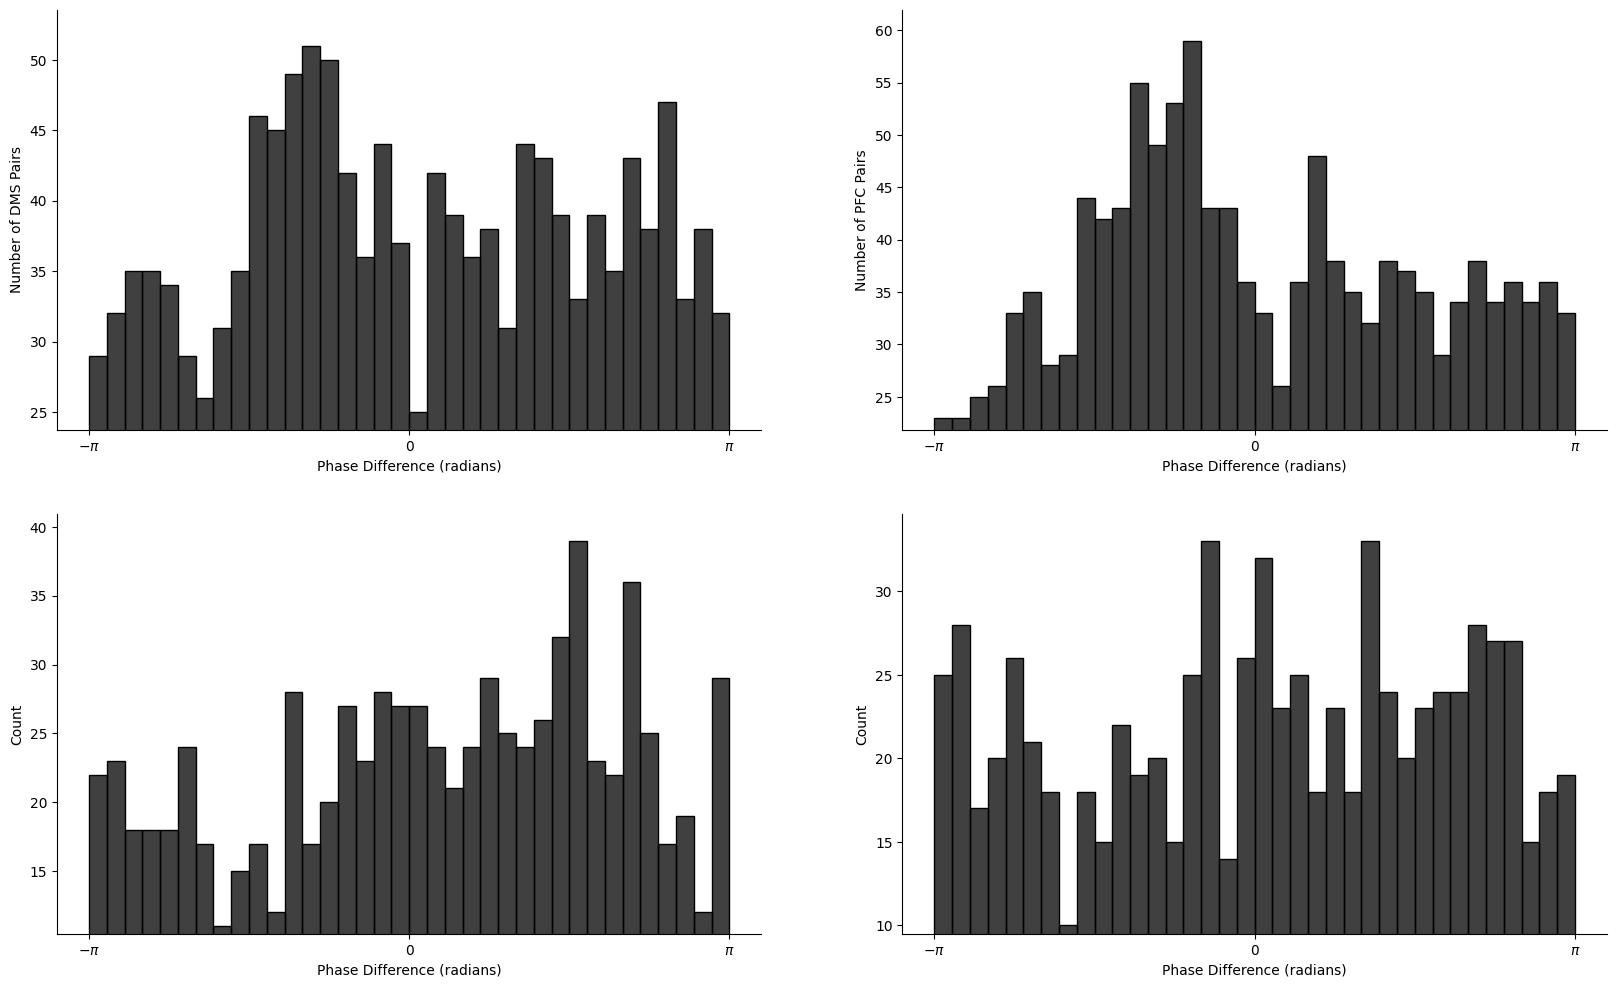

In [4]:
from lib.figure_6 import get_figure_6_panel_e

fig = get_figure_6_panel_e(mono=False, no_nan=False, zero_ymin=False)